<a href="https://www.kaggle.com/fatihersoy/ceng-518hw?scriptVersionId=84070343" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import sqrt, abs, round
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing

In [2]:
df = pd.read_csv("../input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [4]:
df_without_null_prices = df[~df["Price"].isnull()]
prices = df_without_null_prices["Price"]
prices

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63016     347700.0
63017     808000.0
63018     566000.0
63019     500000.0
63020     545000.0
Name: Price, Length: 48433, dtype: float64

In [5]:
#def division(n):
#    return n/10000
#prices = prices.apply(lambda x: x/10000)
#prices

In [6]:
in_abbotsford = df_without_null_prices.loc[df["Suburb"] == "Abbotsford"]
prices_in_abbotsford = in_abbotsford["Price"]
prices_in_abbotsford

0        1490000.0
1        1220000.0
2        1420000.0
670      1350000.0
1622      830000.0
           ...    
61303     666000.0
61304     930000.0
61733    1030000.0
61735     927000.0
62222     750000.0
Name: Price, Length: 142, dtype: float64

In [7]:
#prices_in_abbotsford = prices_in_abbotsford.apply(lambda x: x/10000)

In [8]:
#prices = (prices-prices.mean())/prices.std()
#prices
#prices_in_abbotsford = (prices_in_abbotsford-prices_in_abbotsford.mean())/prices_in_abbotsford.std()
#prices_in_abbotsford

In [9]:
prices_in_abbotsford_mean = prices_in_abbotsford.mean()
prices_in_abbotsford_mean

1040200.7042253522

In [10]:
prices_mean = prices.mean()
prices_mean

997898.2414882415

In [11]:
prices_in_abbotsford_std = prices_in_abbotsford.std()
prices_in_abbotsford_std

374652.7473051951

In [12]:
prices_std = prices.std()
#prices_std = np.std(prices)
prices_std

593498.9190372757

In [13]:
prices_in_abbotsford_len = len(prices_in_abbotsford)
prices_in_abbotsford_len
prices_len = len(prices)
prices_len

48433

In [14]:
under = sqrt((prices_in_abbotsford_std ** 2 / prices_in_abbotsford_len) + (prices_std ** 2 / prices_len))
under

31555.608323979883

In [15]:
above = prices_in_abbotsford_mean - prices_mean
above

42302.462737110676

In [16]:
z = above / under
z

1.3405687604812864

In [17]:
p_value = 2 * (1-norm.cdf(abs(z)))
p_value

0.1800605056015625

In [18]:
min_price = prices.min()
max_price = prices.max()
min_abbotsford_price = prices_in_abbotsford.min()
max_abbotsford_price = prices_in_abbotsford.max()

In [19]:
prices_in_abbotsford_mean
prices_std

593498.9190372757

In [20]:
#mu = prices_mean
#std = prices_std
#sigma = math.sqrt(std)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#x = np.linspace(min_price, max_price, 100)
#plt.plot(x, norm.pdf(x, mu, sigma))
#plt.show()

In [21]:
standard_error = prices_std / sqrt(prices_in_abbotsford_len)
standard_error


49805.32290253178

In [22]:
mean_diff = prices_in_abbotsford_mean - prices_mean

In [23]:
standard_errors_away = mean_diff / standard_error
standard_errors_away

0.8493562589664546

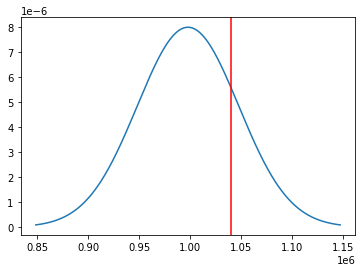

In [24]:
mu = prices_mean
variance = prices_std / sqrt(prices_in_abbotsford_len)
#sigma = math.sqrt(variance)
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, len(prices))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.axvline(x=prices_in_abbotsford_mean, color="r")
plt.show()

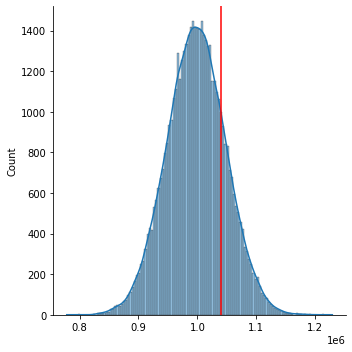

In [25]:
import seaborn as sns
value = np.random.normal(loc=prices_mean,scale=sigma,size=len(prices))
sns.displot(value, kde=True)
plt.axvline(prices_in_abbotsford_mean, color='red') # Plot a vertical line at corresponding x